In [1]:
import pandas as pd
#import hockey_rink as hr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math



In [2]:
# read in the data
df = pd.read_csv('../data/events.csv')


In [3]:
# each row has a column EventStartCoordinate and EventEndCoordinate which if applicable, contains the x and y coordinates of the event.
# these columns need to be split into two columns, one for x and one for y
df[['EventStartX', 'EventStartY']] = df['EventStartCoordinate'].str.split(',', expand=True)
df[['EventEndX', 'EventEndY']] = df['EventEndCoordinate'].str.split(',', expand=True)
# convert the columns to numeric
df['EventStartX'] = pd.to_numeric(df['EventStartX'])
df['EventStartY'] = pd.to_numeric(df['EventStartY'])
df['EventEndX'] = pd.to_numeric(df['EventEndX'])
df['EventEndY'] = pd.to_numeric(df['EventEndY'])

df

,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,EventStartCoordinate,...,StartPlayerDirection7,StartPlayerDirection8,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12,EventStartX,EventStartY,EventEndX,EventEndY
0,1,0,1708857103760,Faceoff,FullStrength,5v5,True,True,NeutralZone,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1708857103760,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-0.1,-0.3",...,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,-0.3,-3.1,2.2
2,1,0,1708857104540,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-3.1,2.2",...,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,2.2,-6.0,4.6
3,1,1,1708857105420,Pass,FullStrength,5v5,True,True,NeutralZone,"-6,4.7",...,"-0.789,-0.614","-0.379,0.925","-0.67,-0.742","0.09,-0.996","-0.973,0.231","-0.18,0.984",-6.0,4.7,-11.4,-4.1
4,1,1,1708857105440,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-6,4.6",...,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,4.6,-11.4,-4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,1,1199,1708858702000,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-4.4,-11.1",...,NaN,NaN,NaN,NaN,NaN,NaN,-4.4,-11.1,-2.9,-11.4
1159,1,1199,1708858702500,PuckControl,FullStrength,5v5,True,True,NeutralZone,"-2.9,-11.4",...,NaN,NaN,NaN,NaN,NaN,NaN,-2.9,-11.4,-13.3,-6.0
1160,1,1200,1708858702880,BluelineCrossing,FullStrength,5v5,True,True,NeutralZone,"-7.2,-9.6",...,"0.945,0.326","0.622,-0.783","0.834,-0.552","0.865,-0.501","0.953,-0.302","-0.402,0.916",-7.2,-9.6,NaN,NaN
1161,1,1200,1708858703360,PuckControl,FullStrength,5v5,True,True,HomeTeamZone,"-13.3,-6",...,NaN,NaN,NaN,NaN,NaN,NaN,-13.3,-6.0,-13.1,-4.9


In [4]:
# Functions

# Euclidean distance between two points
def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

In [7]:
# just taking the event with type shot or pass
dfshot_goal = df[(df['EventType'] == 'Shot') | (df['EventType'] == 'Pass')]

for index, event in dfshot_goal.head().iterrows():
    
    #print(f"Index: {index}")
    #print(f"Name: {event['EventType']}")

    # Function to calculate the Euclidean distance between two points
    def distance(point1, point2):
        return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
    
    playerNumbers = []

    primary_player_id = event['EventPrimaryPlayerId']
    
    # skip nan values
    if len(df.columns[event == primary_player_id].drop('EventPrimaryPlayerId')) == 0:
        continue
    else:
        primary_player_number = df.columns[event == primary_player_id].drop('EventPrimaryPlayerId')[0][13]
    
    goal_coords = [85,]
    
    if event['EventPrimaryTeam'] == "Home":
        primary_player_team = "Home"
        opponent_team = "Away"
    elif event['EventPrimaryTeam'] == "Away":
        primary_player_team = "Away"
        opponent_team = "Home"
    else:
        print("Error: The team is neither home nor away.")
    
    distances_to_opponents = []
    for i in range(1, 12):

        coords_primary = event[f'StartPlayerCoordinates{primary_player_number}'].split(',')
        float_coords_primary = [float(coord) for coord in coords_primary]
        
        #print(event[f'StartPlayerTeam{i}'])
        if event[f'StartPlayerTeam{i}'] == opponent_team: 
            
            primary_player_id = event['EventPrimaryPlayerId']
            
            #print(df.columns[event == primary_player_id])
           
            coords_player_cur = event[f'StartPlayerCoordinates{i}'].split(',')
            float_coords_player_cur = [float(coord) for coord in coords_player_cur]
            distances_to_opponents.append(distance(float_coords_primary, float_coords_player_cur))
            
            print(float_coords_primary)

    mean_distance = sum(distances_to_opponents)/len(distances_to_opponents)
    
    print("This is the mean distance of all opponents players to the primary player: " + str(mean_distance))
    
    
    distance_to_goal = 0.0
    
    xcur = float(df['EventStartCoordinate'].str.split(',')[1][0])
    
    if xcur > 0:
        
        distance_to_goal = distance([26.0,0.0], float_coords_player_cur)
    
    else:
        distance_to_goal = distance([-26.0,0.0], float_coords_player_cur)
    
    
print("This is the distance to the goal: "+ str(distance_to_goal))
    
    # determine which goal is correct one


# each row has a column EventStartCoordinate and EventEndCoordinate which if applicable, contains the x and y coordinates of the event.
# these columns need to be split into two columns, one for x and one for y
# df[['EventStartX', 'EventStartY']] = 
# df[['EventEndX', 'EventEndY']] = df['EventEndCoordinate'].str.split(',', expand=True)
# # convert the columns to numeric
# 
# df['EventStartY'] = pd.to_numeric(df['EventStartY'])
# df['EventEndX'] = pd.to_numeric(df['EventEndX'])
# df['EventEndY'] = pd.to_numeric(df['EventEndY'])


xcur = float(df['EventStartCoordinate'].str.split(',')[1][0])

#    print(event)
    
if xcur > 0:
        
    distance_to_goal = distance([26.0,0.0], float_coords_player_cur)
    
else:
    distance_to_goal = distance([-26.0,0.0], float_coords_player_cur)
    
    
print("This is the distance to the goal: "+ str(distance_to_goal))
    

This is the mean distance of all opponents players to the primary player: 13.141888235827254
This is the mean distance of all opponents players to the primary player: 11.020423200385382
This is the mean distance of all opponents players to the primary player: 5.8254843807243395
This is the mean distance of all opponents players to the primary player: 6.449373244273242
This is the mean distance of all opponents players to the primary player: 14.982786728898946
This is the distance to the goal: 49.343895265777306


In [9]:
df[(df['EventType'] == 'Shot') | (df['EventType'] == 'Pass')]

,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,EventStartCoordinate,...,StartPlayerDirection7,StartPlayerDirection8,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12,EventStartX,EventStartY,EventEndX,EventEndY
3,1,1,1708857105420,Pass,FullStrength,5v5,True,True,NeutralZone,"-6,4.7",...,"-0.789,-0.614","-0.379,0.925","-0.67,-0.742","0.09,-0.996","-0.973,0.231","-0.18,0.984",-6.0,4.7,-11.4,-4.1
8,1,6,1708857110740,Pass,FullStrength,5v5,True,True,NeutralZone,"-1.6,-3.8",...,"0.449,0.894","0.569,0.822","0.054,0.999","0.074,0.997","0.105,0.995","-0.456,-0.89",-1.6,-3.8,5.1,9.6
12,1,10,1708857114200,Shot,FullStrength,5v5,True,True,AwayTeamZone,"19.8,9.2",...,"0.958,0.288","0.884,-0.468","0.932,0.364","0.876,0.481","0.991,-0.134","0.766,0.643",19.8,9.2,NaN,NaN
16,1,12,1708857116760,Pass,FullStrength,5v5,True,True,AwayTeamZone,"29,10.2",...,"-0.478,0.879","0.309,0.951","-0.999,-0.046","0.237,0.972","0.762,0.648","-0.53,-0.848",29.0,10.2,11.9,14.6
20,1,15,1708857119440,Pass,FullStrength,5v5,True,True,AwayTeamZone,"10.8,13.6",...,"0.161,-0.987","-0.984,0.176","-0.202,0.979","-0.824,-0.566","-0.868,-0.497","-0.906,-0.424",10.8,13.6,19.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,1170,1708858673260,Pass,FullStrength,5v5,True,True,AwayTeamZone,"22.1,14.4",...,"-0.786,0.618","0.248,0.969","-0.65,0.76","-0.801,0.599","0.443,0.897","0.034,0.999",22.1,14.4,14.0,13.9
1137,1,1178,1708858681500,Pass,FullStrength,5v5,True,True,HomeTeamZone,"-29.9,-1.5",...,"-0.94,-0.341","-0.648,-0.761","-0.532,-0.847","-0.625,0.781","0.156,-0.988","0.028,1",-29.9,-1.5,-22.8,-11.8
1144,1,1185,1708858688160,Pass,FullStrength,5v5,True,True,NeutralZone,"-2.9,-14.9",...,"0.938,0.346","0.935,-0.355","-0.913,0.408","0.956,-0.294","0.98,0.2","0.999,-0.051",-2.9,-14.9,-7.6,-0.1
1150,1,1189,1708858692300,Pass,FullStrength,5v5,True,True,HomeTeamZone,"-10.5,9.8",...,"-0.99,-0.144","-0.255,0.967","-0.693,0.721","-0.768,0.641","-0.716,-0.698","0.731,0.682",-10.5,9.8,-21.8,-5.0


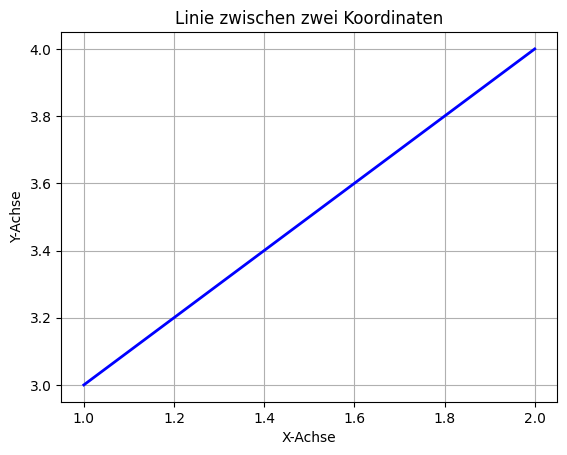

In [2]:
import matplotlib.pyplot as plt

# Koordinaten für die Linie definieren
x_coords = [1, 2]  # Ersetze x1 und x2 durch deine x-Koordinaten
y_coords = [3, 4]  # Ersetze y1 und y2 durch deine y-Koordinaten

# Plot erstellen
plt.figure()
plt.plot(x_coords, y_coords, color='blue', linestyle='-', linewidth=2)  # Hier kannst du Farbe, Stil und Breite der Linie anpassen

plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.title('Linie zwischen zwei Koordinaten')
plt.grid(True)

plt.show()


In [ ]:
def plot_event(event):
    
    rink = hr.IIHFRink()
    
    rightGoal = [26.0 * 3.2833, 0.0]
    leftGoal = [-26.0 * 3.2833, 0.0]
 
    if event['EventPrimaryTeam'] == "Home":
        enemygoal = rightGoal
        Team = 'Home'
        goal_coords = pd.DataFrame({'x': [26.0 * 3.2833], 'y': [0 * 3.28]})
    
    elif event['EventPrimaryTeam'] == "Away":
        enemygoal = leftGoal
        Team = 'Away'
        goal_coords = pd.DataFrame({'x': [-26.0 * 3.2833], 'y': [0 * 3.28]})
        
    else:
        print("Error: The team is neither home nor away.")
    
    playerPos = [event['RinkX'], event['RinkY']]
    
    radius = mean_distance_to_opponents(playerPos[0], playerPos[1], Team, event)
    
    distancetogoal = distance_to_enemy_goal(playerPos[0], playerPos[1], Team)
    
    print(f'Distance to goal: {distancetogoal}')
    print(f'Mean distance to opponents: {radius}')
    
    fig, ax = plt.subplots(figsize=(18, 8))
    # Hockeyfeld zeichnen
    rink.draw(ax=ax)
    
    # Formen zeichnen
    circle = plt.Circle((playerPos[0], playerPos[1]), radius, color='purple', fill=False)
    ax.add_patch(circle)
    
    line = plt.Line2D([playerPos[0], enemygoal[0]], [playerPos[1], enemygoal[1]], color='red')
    ax.add_line(line)
    
    # Aktuelle Zeile plotten
    sns.scatterplot(x='RinkX', y='RinkY', s=100, edgecolor='white', data=pd.DataFrame([event]), color='orange', ax=ax)
    sns.scatterplot(x='x', y='y', data=goal_coords, color='purple', s=100, legend=False, ax=ax)
    
    # Spielerpositionliste konvertieren
    df['RinkX'], df['RinkY'] = rink.convert_xy(df['EventStartX'] * 3.2833 , df['EventStartY'] * 3.28)
    
    # Home-Team und Away-Team selektieren
    dfHome = df[df['EventPrimaryTeam'] == 'Home']
    dfAway = df[df['EventPrimaryTeam'] == 'Away']
    
    # Spielerpositionen plotten
    sns.scatterplot(x='RinkX', y='RinkY', s=100, edgecolor='white', data=dfHome, color='green', label='Home Team', ax=ax)
    sns.scatterplot(x='RinkX', y='RinkY', s=100, edgecolor='white', data=dfAway, color='blue', label='Away Team', ax=ax)
    
    plt.legend()
    plt.show()
